# Calculate NLP statistics over classification results in excel format
Analyse a excel sheet of NLP classification results.

Use yaml config

In [46]:
use_config_file = True
config_file = './../resources/config/result-analysis-tn-tn-train.yaml'
cfg = None
if use_config_file:
    import yaml
    with open(config_file, 'r') as yaml_file:
        cfg = yaml.safe_load(yaml_file)


Set path of excel sheet

In [47]:
path_excel_sheet = "./../resources/data_ignored/context_results.xlsx"
if use_config_file:
    path_excel_sheet = cfg['path_excel_sheet']


Set output directory

In [48]:
path_output_dir = "./../resources/"

out_file = None
if use_config_file:
    path_output_dir = cfg['path_output_dir']
try:
    from pathlib import Path
    Path(path_output_dir).mkdir(parents=True, exist_ok=True)
    out_file = open(path_output_dir + "/"+ "result-analysis-out.txt", "w")
except OSError:
    print ("Creation of the directory %s failed" % path_output_dir)
else:
    print ("Successfully created the directory %s " % path_output_dir)
    

Successfully created the directory ./../resources/results/20200116-tnm-tn-train-merge 


Set label and classification columns

In [49]:
column_actual = 'label longembolie'
column_predicted = 'target-snomedct:59282003'

if use_config_file:
    column_actual = cfg['column_actual']
    column_predicted = cfg['column_predicted']

Read columns and determine values, in case of key error, make sure the columns are set correctly

In [50]:
import pandas
df = pandas.read_excel(path_excel_sheet, header=0)

actual_values = df[column_actual].value_counts().index.tolist() 
predicted_values = df[column_predicted].value_counts().index.tolist() 

print('actual category values:', actual_values)
print('predicted category values:', predicted_values)
all_values = list(set(actual_values).union(set(predicted_values)))
print(all_values)

actual category values: ['T4N2', '??', 'T4N3', 'T4N0', 'T1cN0', 'T1bN0', 'T3N3', 'T3N2', 'T3N0', 'T2aN0', 'T2N2', 'T2bN0', 'T2bN2', 'T1cN3', 'T2aN2', 'T2bN3', 'T4?', 'T2a?', 'T1bN1', 'T1cN2', 'T2aN1', 'T3?', 'T3N1', 'T2N3', 'T2b?', 'T2aN3', 'T1aN2', 'T0N2']
predicted category values: ['T4N2', 'T4N3', 'T3N2', 'T1cN0', 'T1bN0', 'T4N0', 'T3N0', 'T2aN0', 'T3N3', 'T2bN2', 'T2bN0', 'T2bN3', 'T3N1', 'T2aN3', 'T2N0', 'T1bN1', 'T0N3', 'T1cN3', 'T1cN2', 'T2N2', 'T2aN2', 'T0N0', 'T0N2', 'T2aN1', 'T1bN3', 'T0N1', 'T4N1', 'T2N3', 'T1cN1', 'T2bN1', 'T1aN2']
['T1cN0', 'T1cN2', 'T2N3', 'T1bN0', '??', 'T4N3', 'T1bN3', 'T2a?', 'T4N1', 'T0N0', 'T4?', 'T1cN3', 'T2aN0', 'T0N2', 'T0N3', 'T4N0', 'T4N2', 'T2N2', 'T3?', 'T2bN3', 'T3N3', 'T2aN3', 'T1bN1', 'T2b?', 'T2bN0', 'T3N1', 'T0N1', 'T3N2', 'T2N0', 'T2aN2', 'T2aN1', 'T2bN2', 'T1cN1', 'T2bN1', 'T1aN2', 'T3N0']


Manually set valid values from actual and predicted categories (other values will be ignored)

In [51]:
valid_values = []
ignored_values = []

if use_config_file and 'valid_values' in cfg:
    valid_values = cfg['valid_values']
if use_config_file and 'ignored_values' in cfg:
    ignored_values = cfg['ignored_values']

if not valid_values or len(valid_values) == 0:
    valid_values = all_values
    
def matches_ignored(x):
    for ignored in ignored_values:
        if ignored in x:
            return True
    return False
    
valid_values = [] 
for x in all_values:
    if not matches_ignored(x):
        valid_values.append(x)

valid_values.sort()

Check valid values

In [52]:
df_valid = df[df[column_actual].isin(valid_values)]

actual_index_valid = df_valid[column_actual].value_counts().index.tolist() 
predicted_index_valid = df_valid[column_actual].value_counts().index.tolist() 

print('actual category values:', actual_index_valid)
print('predicted category values:', predicted_index_valid)

actual category values: ['T4N2', 'T4N3', 'T1bN0', 'T4N0', 'T1cN0', 'T3N2', 'T3N3', 'T3N0', 'T2bN0', 'T2aN0', 'T2N2', 'T2bN2', 'T2aN2', 'T2bN3', 'T1cN3', 'T1cN2', 'T1bN1', 'T2aN1', 'T2aN3', 'T2N3', 'T3N1', 'T1aN2', 'T0N2']
predicted category values: ['T4N2', 'T4N3', 'T1bN0', 'T4N0', 'T1cN0', 'T3N2', 'T3N3', 'T3N0', 'T2bN0', 'T2aN0', 'T2N2', 'T2bN2', 'T2aN2', 'T2bN3', 'T1cN3', 'T1cN2', 'T1bN1', 'T2aN1', 'T2aN3', 'T2N3', 'T3N1', 'T1aN2', 'T0N2']


Histograms Original

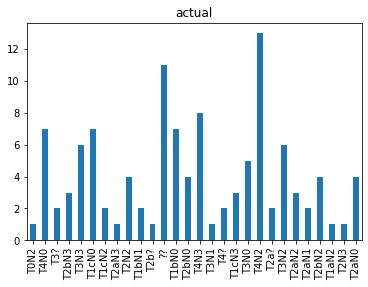

In [53]:
actual_bar_plt = df[column_actual].value_counts(sort = False).plot(kind='bar', title='actual')

Histograms Valid Values only

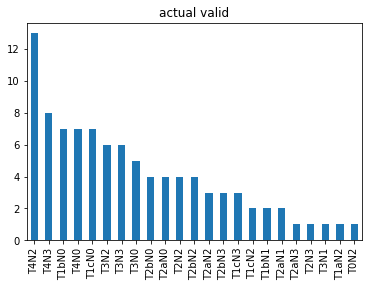

In [54]:
actual_valid_bar_plot = df_valid[column_actual].value_counts().plot(kind='bar', title='actual valid')

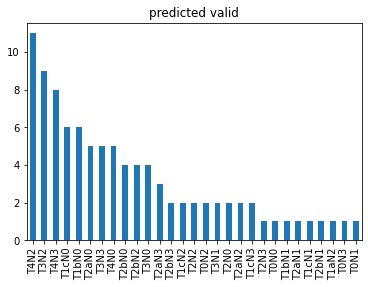

In [55]:
predicted_valid_bar_plt = df_valid[column_predicted].value_counts().plot(kind='bar', title='predicted valid')

Compute accuracy

In [56]:
df = df_valid
accuracy = df[df[column_predicted] == df[column_actual]].shape[0]/df.shape[0]
print("Accuracy = " + str(round(accuracy * 100, 2)) + "%")
out_file.write("Accuracy = " + str(round(accuracy * 100, 2)) + "%" + "\n\n")

Accuracy = 72.63%


19

F-scores

In [57]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils.multiclass import unique_labels
y_actu = pandas.Series(df[column_actual], name='Actual')
y_pred = pandas.Series(df[column_predicted], name='Predicted')

labels = unique_labels(y_actu, y_pred)
prf = precision_recall_fscore_support(y_actu, y_pred, average=None, labels=valid_values)
evaldf = pandas.DataFrame({"Precision": prf[0], "Recall": prf[1], "F-score": prf[2]}, index=valid_values)
print(evaldf)
out_file.write(str(evaldf) + "\n\n")

       Precision    Recall   F-score
T0N0    0.000000  0.000000  0.000000
T0N1    0.000000  0.000000  0.000000
T0N2    0.000000  0.000000  0.000000
T0N3    0.000000  0.000000  0.000000
T1aN2   1.000000  1.000000  1.000000
T1bN0   1.000000  0.857143  0.923077
T1bN1   1.000000  0.500000  0.666667
T1bN3   0.000000  0.000000  0.000000
T1cN0   1.000000  0.857143  0.923077
T1cN1   0.000000  0.000000  0.000000
T1cN2   0.500000  0.500000  0.500000
T1cN3   1.000000  0.666667  0.800000
T2N0    0.000000  0.000000  0.000000
T2N2    0.500000  0.250000  0.333333
T2N3    1.000000  1.000000  1.000000
T2aN0   0.800000  1.000000  0.888889
T2aN1   1.000000  0.500000  0.666667
T2aN2   1.000000  0.666667  0.800000
T2aN3   0.333333  1.000000  0.500000
T2bN0   1.000000  1.000000  1.000000
T2bN1   0.000000  0.000000  0.000000
T2bN2   0.750000  0.750000  0.750000
T2bN3   1.000000  0.666667  0.800000
T3N0    1.000000  0.800000  0.888889
T3N1    0.500000  1.000000  0.666667
T3N2    0.555556  0.833333  0.666667
T

c:\users\sander.puts\ideaprojects\work\venv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sander.puts\ideaprojects\work\venv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1185

Create confusion matrix

In [58]:
confusion_matrix = pandas.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("CONFUSION MATRIX")
print(confusion_matrix)
out_file.write(str(confusion_matrix))

CONFUSION MATRIX
Predicted  T0N0  T0N1  T0N2  T0N3  T1aN2  T1bN0  T1bN1  T1cN0  T1cN1  T1cN2  \
Actual                                                                        
T0N2          0     0     0     0      0      0      0      0      0      1   
T1aN2         0     0     0     0      1      0      0      0      0      0   
T1bN0         0     0     0     0      0      6      0      0      0      0   
T1bN1         0     0     0     0      0      0      1      0      1      0   
T1cN0         0     0     0     0      0      0      0      6      0      0   
T1cN2         0     0     0     0      0      0      0      0      0      1   
T1cN3         0     0     0     0      0      0      0      0      0      0   
T2N2          0     0     2     0      0      0      0      0      0      0   
T2N3          0     0     0     0      0      0      0      0      0      0   
T2aN0         0     0     0     0      0      0      0      0      0      0   
T2aN1         0     1     0     0  

4106

Plot confusion matrix

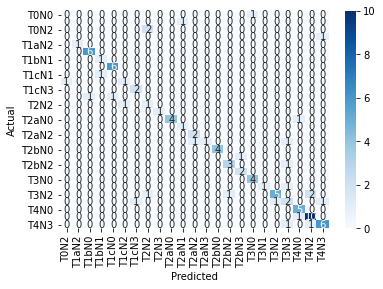

In [59]:
import seaborn
import matplotlib
data = {'y_Actual':    df_valid[column_predicted],
        'y_Predicted': df_valid[column_actual]
        }

df = pandas.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pandas.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix_heatmap = seaborn.heatmap(confusion_matrix, annot=True, cmap=matplotlib.cm.Blues)

Save confusion matix figure to file

In [60]:
file_type_eps = False
if file_type_eps:
    confusion_matrix_heatmap.figure.savefig(path_output_dir + "/" + "confusion_matrix.eps", dict="eps")
else:
   confusion_matrix_heatmap.figure.savefig(path_output_dir + "/" + "confusion_matrix.png")

out_file.close()